<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week09/dbscan_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_circles

In [6]:
# Make the circles
circles = make_circles(n_samples = 1000, noise = 0.15, factor = 0.1, random_state = 42)[0]
circles[:5]

array([[ 0.00624286,  0.14012181],
       [ 0.06728077,  0.13200944],
       [-0.20771233,  0.37761054],
       [-0.30811441, -0.06441166],
       [ 0.46257516, -0.88599616]])

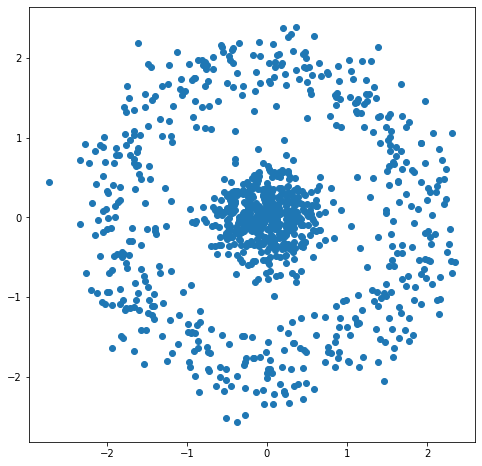

In [12]:
# Scale the data
circles = StandardScaler().fit_transform(circles)
plt.figure(figsize = (8, 8));
plt.scatter(circles[:, 0], circles[:, 1]);

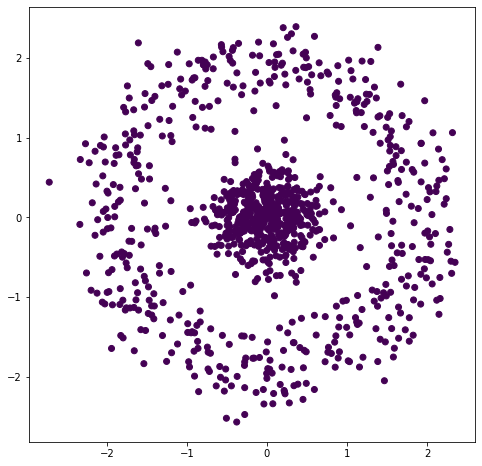

In [24]:
# Default DBSCAN
db = DBSCAN()
db.fit(circles)
plt.figure(figsize = (8, 8));
plt.scatter(circles[:, 0], circles[:, 1], c = db.labels_);

In [28]:
# Create a list of neighbors using NearestNeighbors
min_samples = 20
neighbors = NearestNeighbors(n_neighbors = min_samples)
neighbors.fit(circles)
distances, indices = neighbors.kneighbors(circles)
distances[:5]

array([[0.        , 0.03317269, 0.03684657, 0.03843617, 0.04554815,
        0.05305751, 0.06605228, 0.06636566, 0.06666659, 0.06791302,
        0.06838348, 0.07565918, 0.08259865, 0.08645387, 0.09075917,
        0.09190577, 0.09250838, 0.09312995, 0.09721234, 0.10403576],
       [0.        , 0.02141877, 0.02190873, 0.0525583 , 0.0620055 ,
        0.07445293, 0.07513315, 0.0866166 , 0.08930404, 0.08980387,
        0.0967244 , 0.10350215, 0.10375638, 0.10582193, 0.10678505,
        0.11096156, 0.11245924, 0.11473956, 0.11562288, 0.11716108],
       [0.        , 0.04395657, 0.28586353, 0.28688404, 0.30905073,
        0.30977458, 0.3160105 , 0.32505776, 0.32710425, 0.33892991,
        0.3436514 , 0.34500361, 0.34906258, 0.35135948, 0.36166579,
        0.36486062, 0.385714  , 0.39221766, 0.39319527, 0.39353591],
       [0.        , 0.05703624, 0.0919583 , 0.09911738, 0.11724588,
        0.12284202, 0.12447331, 0.1270101 , 0.1278932 , 0.12937459,
        0.13616776, 0.14093312, 0.14440086, 0

In [29]:
# Sort the distances
sorted_distances = np.sort(distances[:, min_samples - 1])

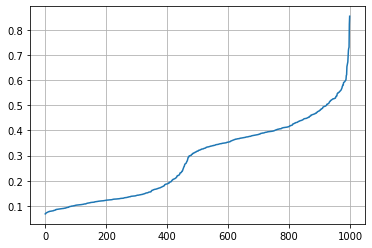

In [33]:
# Plot the sorted distances
plt.plot(sorted_distances)
plt.grid()

In [35]:
# Fit the tuned DBSCAN
dbs = DBSCAN(eps = 0.2, min_samples = min_samples).fit(circles)

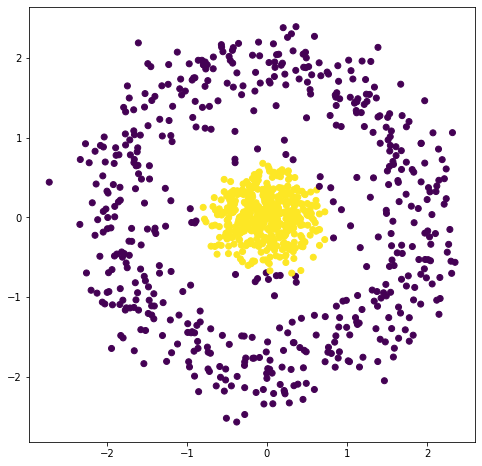

In [37]:
# Plot the clusters
plt.figure(figsize = (8, 8));
plt.scatter(circles[:, 0], circles[:, 1], c = dbs.labels_)

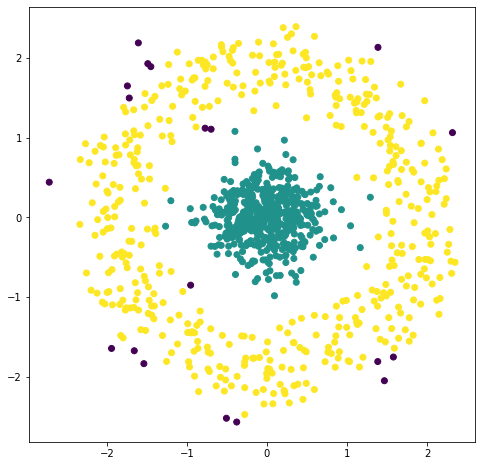

In [38]:
# Plot the clusters with eps = 0.4
dbs = DBSCAN(eps = 0.4, min_samples = min_samples).fit(circles)
plt.figure(figsize = (8, 8));
plt.scatter(circles[:, 0], circles[:, 1], c = dbs.labels_)